In [44]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
import time

In [2]:
lfw = datasets.fetch_lfw_people(min_faces_per_person = 100, resize=0.4)

In [3]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [4]:
lfw.data.shape

(1140, 1850)

In [5]:
lfw.images.shape

(1140, 50, 37)

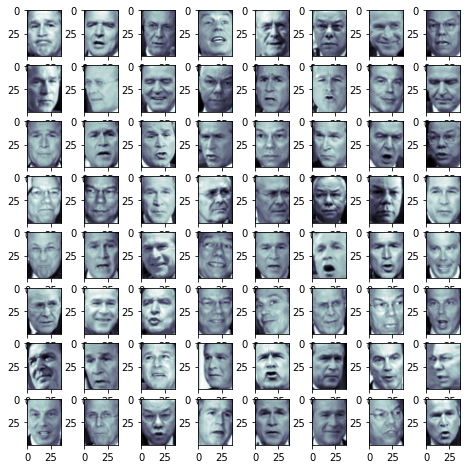

In [6]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(lfw.images[i], cmap = plt.cm.bone)
plt.show()

In [32]:
x, y = lfw.data, lfw.target
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=0)
pca_oliv = PCA()
pca_oliv.fit(X_train)

PCA()

In [33]:
k = 0
total = 0
current_variance = 0
while total < 0.99:
    total+=pca_oliv.explained_variance_ratio_[k]
    k=k+1
k

316

In [35]:
pca_lfw = PCA(n_components = k, whiten=True) #keep whiten as true
x_transformed_data = pca_lfw.fit_transform(X_train)
x_transformed_data.shape

(855, 316)

In [37]:
x_approx = pca_lfw.inverse_transform(x_transformed_data)
x_approx = x_approx.reshape((x_transformed_data.shape[0], 50, 37))
x_approx.shape

(855, 50, 37)

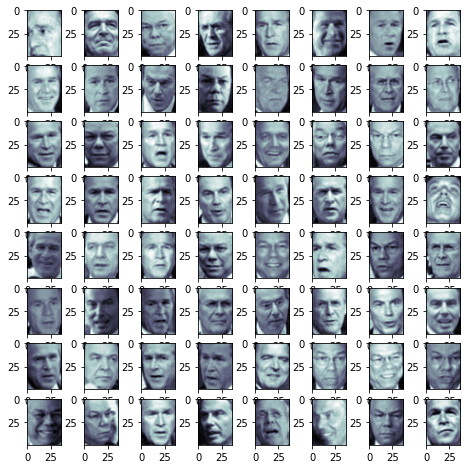

In [38]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_approx[i], cmap = plt.cm.bone)
plt.show()

In [39]:
pca_lfw.components_.shape

(316, 1850)

In [40]:
eigenv = pca_lfw.components_
eigenv.shape

(316, 1850)

In [41]:
eigenfaces = eigenv.reshape((k, 50, 37))


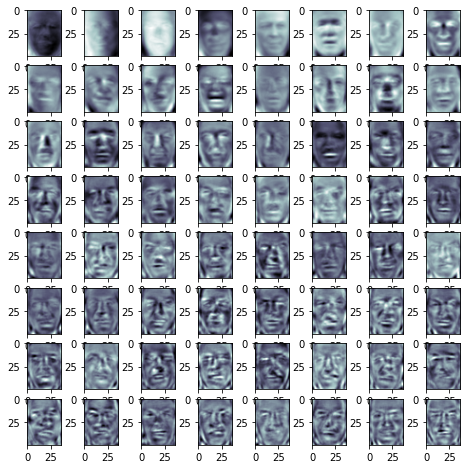

In [42]:
fig = plt.figure(figsize=(8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(eigenfaces[i],cmap = plt.cm.bone)
plt.show()

In [43]:
x_train_pca = x_transformed_data
x_test_pca = pca_lfw.transform(X_test)

In [47]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(X_train, Y_train)
print(time.time()-start)
Y_pred = rf.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

1.426640272140503
              precision    recall  f1-score   support

           0       0.86      0.69      0.76        61
           1       0.73      0.22      0.34        36
           2       0.58      0.99      0.73       122
           3       1.00      0.16      0.28        31
           4       0.80      0.23      0.36        35

    accuracy                           0.65       285
   macro avg       0.79      0.46      0.49       285
weighted avg       0.73      0.65      0.59       285

[[ 42   1  18   0   0]
 [  5   8  22   0   1]
 [  1   0 121   0   0]
 [  0   1  24   5   1]
 [  1   1  25   0   8]]


In [49]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_pca, Y_train)
print(time.time()-start)
Y_pred = rf.predict(x_test_pca)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.8655455112457275
              precision    recall  f1-score   support

           0       0.70      0.23      0.35        61
           1       0.00      0.00      0.00        36
           2       0.46      0.99      0.63       122
           3       0.00      0.00      0.00        31
           4       1.00      0.06      0.11        35

    accuracy                           0.48       285
   macro avg       0.43      0.26      0.22       285
weighted avg       0.47      0.48      0.36       285

[[ 14   0  47   0   0]
 [  3   0  33   0   0]
 [  1   0 121   0   0]
 [  1   0  30   0   0]
 [  1   0  32   0   2]]


/home/arnab/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/arnab/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/arnab/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#need to work with other classifier 